# Exploring the structure of retrosheet data

The play-by-play data we are interested in transforming are contained in comma-delimited text files in a jagged format. Lines prepended by the word "play" contain six fields describing a single event in a game, and there are two files for every game in a season (one recording data from the home team's perspective, and one from the visiting team's perspective).

The six fields following the "play" tag are as follows:

1. inning: value >= 1, describes the inning in which the play occurred
2. home/visitor: value 0 or 1, 0 means top of the inning (visitor batting), 1 means bottom of the inning (home batting)
3. player id: string, unique id for the player batting
4. count: two-digit number representing the count at which the play occurs, the first digit is # of balls, second is # of strikes (i.e., 00 means the play occurred on the first pitch of the at bat whereas 32 represents a full count)
5. pitches, string of variable length recording all pitches thrown in the plate appearance
6. event, string of variable length indicating the outcome of the plate appearance

Since the play data is the data we are interested in parsing to answer analytical questions, and the number of fields in this section is homogeneous, we can safely extract all lines prepended by "play" to get what we need.

We will need to perform an additional step of deduping the files by taking only the home team files, but once we do this we will have all MLB play-by-play data going back to 1915.

# How to use retrosheet data to answer questions

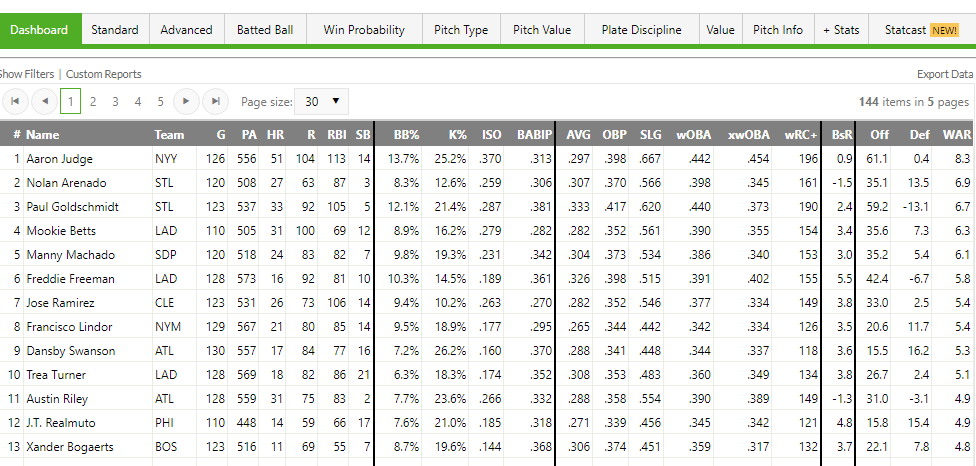

We want to transform individual play-by-play data across the course of multiple seasons to be able to aggregate into commonly used baseball statistics such as HR, RBI, AVG, OBP, and SLG for an individual player, as shown in the table above.

Not only will we be able to aggregate this information across seasons, but across specific counts in an at bat, by handedness of the batter, by where the ball was put in play, etc. One example of the kind of question we could answer with this data outside of generating basic statistics is: how many HR were hit on 1-1 counts in the 2010 season? To do this, we would parse the event string to find if the outcome of the at bat in question was a HR, and aggregate over all outcomes in 2010.

# Creating the optimal data model for ETL purposes

Given that one fact table can easily contain most of what we will need to query (play outcomes, pitch counts, etc.), and new data will come in at most once a day in theory, it makes the most sense to build a simple star schema to house our data. This will allow for faster, simpler queries because the data will be denormalized, and the negatives of higher potential error rate for updating data is minimized by the low frequency of updates.

Only three dimension tables will suffice for joining with the fact table: ballpark info, player info, and team info. 

See below for an ED diagram representing our proposed data model:

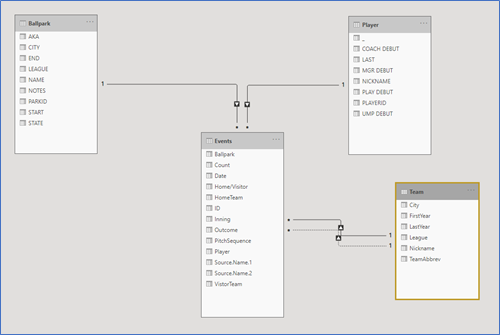